In [38]:
annotator = "Darina"

root = r"/Volumes/Maria_3/MASTER THESIS_MARIA/Annotations/"


In [28]:
import matplotlib.pyplot as plt
import json
from skimage import draw
import numpy as np
from PIL import Image
import os

Image.MAX_IMAGE_PIXELS = 500000000

In [30]:
plt.imread ( root +"Annotations_Darina/images_ds8\P2RX3/08_17_24_humanDRG_R6.1_NF200_DAPI_P2RX3_CIRL1_stain-P2RX3.tiff")

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
/var/folders/ts/xrvnqbyj0fs34d_nhlbmpbch0000gn/T/ipykernel_20768/2448356699.py:1: SyntaxWarning: invalid escape sequence '\P'
  plt.imread ( root +"Annotations_Darina/images_ds8\P2RX3/08_17_24_humanDRG_R6.1_NF200_DAPI_P2RX3_CIRL1_stain-P2RX3.tiff")


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [32]:
def poly2mask(polygons, img):
    mask = np.zeros(img.shape, dtype=bool)
    for poly in polygons:
        if len(poly) == 1:
            poly = np.array(poly[0])
        vertex_row_coords = poly[:, 1]
        vertex_col_coords = poly[:, 0]
        fill_row_coords, fill_col_coords = draw.polygon(vertex_row_coords, vertex_col_coords, img.shape)    
        mask[fill_row_coords, fill_col_coords] = True
        fill_row_coords, fill_col_coords = draw.polygon(vertex_row_coords, vertex_col_coords, img.shape)    
        mask[fill_row_coords, fill_col_coords] = True

    return mask

In [34]:
def json_to_mask(img_path, json_path, name):
    img = plt.imread(img_path)
    with open(json_path) as j_file:
        ann = json.load(j_file)
    polygons = []
    for an in ann:
        poly = an["geometry"]["coordinates"]
        if len(poly) !=1:
            # This happens sometimes, where the polygon contains one additional small list
            poly = poly[0]
        polygons.append(np.array(poly))
    mask = poly2mask(polygons, img)
    plt.imshow(mask)
    plt.show()
    mask = Image.fromarray(mask)
    mask.save(root + annotator+"_masks/"+name+".png",)

08_25_24_huamnDRG_R3.2_NF200_DAPI_P2RX3_CIRL1_stain-P2RX3.tiff


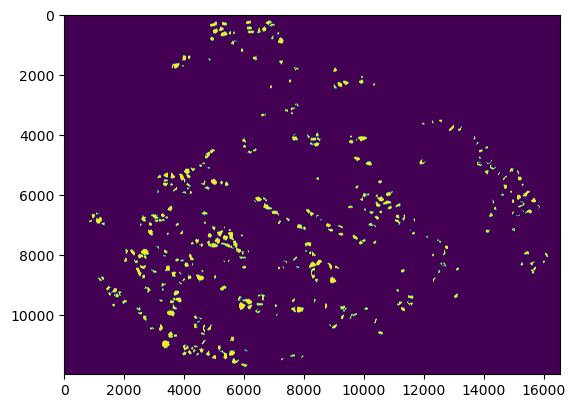

08_17_24_humanDRG_R6.1_NF200_DAPI_P2RX3_CIRL1_stain-P2RX3.tiff


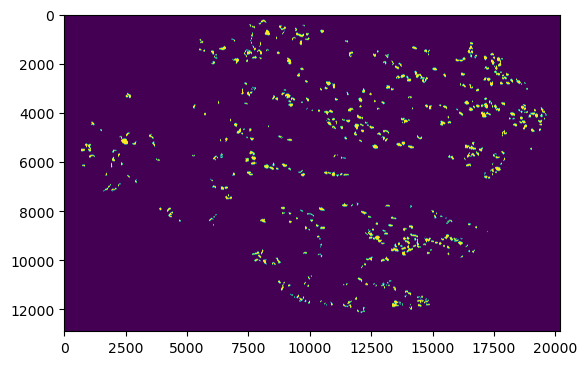

08_18_24_humanDRG_P2.1_NF200_DAPI_P2RX3_CIRL1_stain-P2RX3.tiff


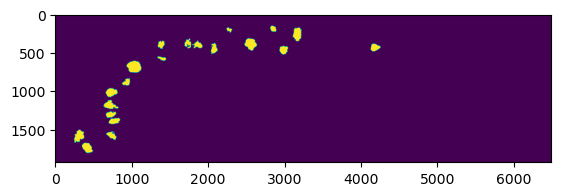

08_18_24_humanDRG_P2.2_NF200_DAPI_P2RX3_CIRL1_stain-P2RX3.tiff


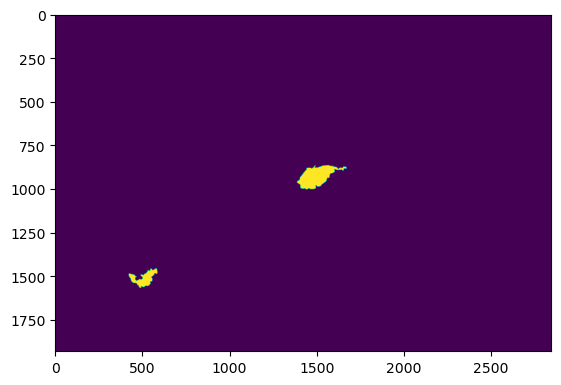

08_18_24_humanDRG_P8.1_NF200_DAPI_P2RX3_CIRL1_stain-P2RX3.tiff


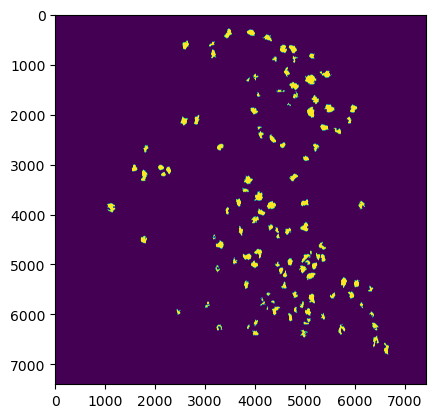

08_18_24_humanDRG_P10.2_NF200_DAPI_P2RX3_CIRL1_stain-P2RX3.tiff


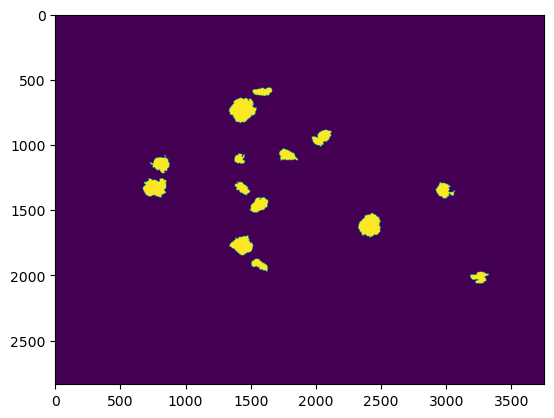

08_18_24_humanDRG_R1.2_NF200_DAPI_P2RX3_CIRL1_stain-P2RX3.tiff


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (4,) + inhomogeneous part.

In [40]:
for img_name, json_name in zip(os.listdir(root + "images"), 
                               os.listdir(root + annotator + "_json")):
    img_path = os.path.join(root + "images",img_name)
    json_path = os.path.join(root + annotator + "_json",json_name)
    name = img_name[:-4]
    print(img_name)
    json_to_mask(img_path, json_path, name)

## einzelne Bilder nachziehen

In [78]:
img_path = root + "images/0015.tif"
json_path = root + "json_Feli/0015.json"
name = "0015"
print(name)
json_to_mask(img_path, json_path, name)

0015


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed